In [1]:
# Decision Tree

In [2]:
%%bash
# pip3 install pydotplus
# pip3 install graphviz

In [3]:
import pandas as pd
import numpy as np
import time

# For decision tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

# For plotting
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

%matplotlib inline

/home/alex/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [4]:
# Global variables
colors = ['green', 'blue', 'orange', 'red', 'purple', 'yellow', 'cyan', 
          'black', 'pink', 'teal', 'aqua', 'maroon']
markers = ["o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d"]
dfs = []
df = pd.DataFrame()
file_name = 'employees.csv'
target = False
inputs = False
inputs_n = False

In [5]:
def pre_process_data():
    global df, target, inputs, inputs_n
    # Read csv file
    df = pd.read_csv(file_name, delim_whitespace=True)
    
    target = df['status']
    inputs = df.drop('status', axis='columns')
    
    le_department = LabelEncoder()
    le_age = LabelEncoder()
    le_salary = LabelEncoder()
    
    inputs["department_n"] = le_department.fit_transform(inputs['Department'])
    inputs["age_n"] = le_age.fit_transform(inputs['age'])
    inputs["salary_n"] = le_salary.fit_transform(inputs['salary'])
    
    inputs_n = inputs.drop(['Department', 'age', 'salary'], axis='columns')

    

In [6]:
pre_process_data()
print(df)
print(inputs)

   Department  status     age    salary  count
0       sales  senior  31..35  46K..50K     30
1       sales  junior  26..30  26K..30K     40
2       sales  junior  31..35  31K..35K     40
3     systems  junior  21..25  46K..50K     20
4     systems  senior  31..35  66K..70K      5
5     systems  junior  26..30  46K..50K      3
6     systems  senior  41..45  66K..70K      3
7   marketing  senior  36..40  46K..50K     10
8   marketing  junior  31..35  41K..45K      4
9   secretary  senior  46..50  36K..40K      4
10  secretary  junior  26..30  26K..30K      6
   Department     age    salary  count  department_n  age_n  salary_n
0       sales  31..35  46K..50K     30             1      2         4
1       sales  26..30  26K..30K     40             1      1         0
2       sales  31..35  31K..35K     40             1      2         1
3     systems  21..25  46K..50K     20             3      0         4
4     systems  31..35  66K..70K      5             3      2         5
5     systems  2

In [7]:
model = tree.DecisionTreeClassifier()

In [8]:
model.fit(inputs_n, target.values)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
model.score(inputs_n, target)

1.0

In [10]:
model.predict([[6,2,1,0]])

array(['junior'], dtype=object)

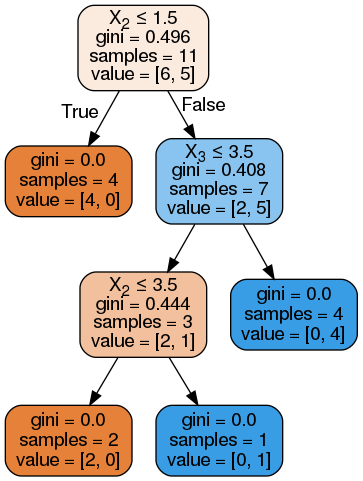

In [11]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())